In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
acq = pd.read_csv('Customer Acqusition.csv')

In [3]:
spend = pd.read_csv('spend.csv')

In [4]:
repay = pd.read_csv('Repayment.csv')

In [5]:
spend['Month'] = pd.to_datetime(spend['Month'])

In [6]:
repay['Month'] = pd.to_datetime(repay['Month'])

In [7]:
df_spend = pd.merge(acq,spend,how='inner',on='Customer')

In [8]:
repay.shape

(1523, 5)

In [9]:
repay.drop(repay.columns[4], axis = 1, inplace = True)

In [10]:
repay.drop(repay.columns[0], axis = 1, inplace = True)

In [11]:
repay[repay.isnull().any(axis=1)]

,Customer,Month,Amount
1500,NaN,NaT,NaN
1501,NaN,NaT,NaN
1502,NaN,NaT,NaN
1503,NaN,NaT,NaN
1504,NaN,NaT,NaN
1505,NaN,NaT,NaN
1506,NaN,NaT,NaN
1507,NaN,NaT,NaN
1508,NaN,NaT,NaN
1509,NaN,NaT,NaN


In [12]:
n = 23

repay.drop(repay.tail(n).index, 
        inplace = True) 

In [13]:
repay.shape

(1500, 3)

In [14]:
df_repay = pd.merge(acq,repay,how='inner',on='Customer')

In [15]:
df_repay.shape

(1500, 10)

In [16]:
df_spend.shape

(1500, 12)

In [17]:
df_spend.drop(df_spend.columns[[0,8]], axis = 1, inplace = True)

In [18]:
df_repay.drop(df_repay.columns[0], axis = 1, inplace = True)

In [19]:
df_spend.shape

(1500, 10)

In [20]:
df_repay.shape

(1500, 9)

In [21]:
df_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


In [22]:
df_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


In [23]:
df1 = df_spend
df2 = df_repay

### Ques 1

In [24]:
df1.loc[df1['Age'] < 18, 'Age'] = df1['Age'].mean()

In [25]:
df2.loc[df2['Age'] < 18, 'Age'] = df2['Age'].mean()

In [26]:
df1.loc[df1['Amount'] > df1['Limit'], 'Amount'] = df1['Limit']*0.5

In [27]:
df2.loc[df2['Amount'] > df2['Limit'], 'Amount'] = df2['Limit']

### Ques 2

In [28]:
### Distinct Customers

print(df_spend['Customer'].nunique())
print(df_repay['Customer'].nunique())

100
100


In [29]:
### Distinct Categories

print(df_spend['Type'].nunique(),'categories')

15 categories


In [30]:
### Avg Monthly Spend

df_spend['Mth'] = df_spend['Month'].dt.strftime('%b')

In [31]:
q2_c = df_spend.groupby('Mth').mean()['Amount'].reset_index(name = 'Avg')

In [32]:
m1 = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
q2_c['Mth'] = pd.Categorical(q2_c['Mth'], categories=m1, ordered=True)
q2_c.sort_values(by='Mth',inplace=True)
q2_c = q2_c.reset_index(drop=True)
q2_c

,Mth,Avg
0,Jan,147770.183266
1,Feb,151261.565126
2,Mar,131840.761861
3,Apr,135035.927333
4,May,151623.982190
5,Jun,182037.731429
6,Jul,166326.817857
7,Aug,165759.596190
8,Sep,141131.704524
9,Oct,131017.854286


In [33]:
### Avg Monthly Repay

df_repay['Mth'] = df_repay['Month'].dt.strftime('%b')

In [34]:
q2_d = df_repay.groupby('Mth').mean()['Amount'].reset_index(name = 'Avg')

In [35]:
m2 = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
q2_d['Mth'] = pd.Categorical(q2_d['Mth'], categories=m2, ordered=True)
q2_d.sort_values(by='Mth',inplace=True)
q2_d = q2_d.reset_index(drop=True)
q2_d

,Mth,Avg
0,Jan,163445.534263
1,Feb,158873.098158
2,Mar,156430.854155
3,Apr,167676.814933
4,May,186097.903985
5,Jun,114146.549375
6,Jul,165203.918980
7,Aug,152817.425510
8,Sep,129345.768500
9,Oct,170118.928750


In [36]:
### Top 5 Product types

q2_f = df_spend.groupby('Type').sum()['Amount'].reset_index(name = 'Total')
q2_f

,Type,Total
0,AIR TICKET,20155847.12
1,AUTO,4806060.41
2,BIKE,7009789.53
3,BUS TICKET,16279935.35
4,CAMERA,27690738.44
5,CAR,5107867.45
6,CLOTHES,12302511.36
7,FOOD,20519243.60
8,JEWELLERY,11507786.00
9,MOVIE TICKET,13001899.29


In [37]:
q2_f.sort_values(by='Total',ascending=False,inplace=True)

In [38]:
q2_f = q2_f.reset_index(drop=True)

In [39]:
q2_f[0:5]

,Type,Total
0,PETRO,28597384.98
1,CAMERA,27690738.44
2,FOOD,20519243.60
3,AIR TICKET,20155847.12
4,TRAIN TICKET,19995825.72


In [40]:
### City with max spend

q2_g = df_spend.groupby('City').sum()['Amount'].reset_index(name = 'Total')

In [41]:
max_amt = q2_g['Total'].max()
q2_g.loc[q2_g['Total']==max_amt]

,City,Total
4,COCHIN,45963513.5


In [42]:
### Age grp spending more money


q2_h = df_spend.groupby('Age').sum()['Amount'].reset_index(name = 'Total')

In [43]:
q2_h.sort_values(by='Total',ascending=False,inplace=True)

In [44]:
q2_h = q2_h.reset_index(drop=True)

In [45]:
q2_h[0:1]

,Age,Total
0,28.0,17365270.23


In [46]:
### Top 10 reapayment customers

q2_i = df_repay.groupby('Customer').sum()['Amount'].reset_index(name = 'Total')

In [47]:
q2_i.sort_values(by='Total',ascending=False,inplace=True)
q2_i = q2_i.reset_index(drop=True)

In [48]:
q2_i['Customer'][0:10]

0    A61
1    A60
2    A13
3    A43
4    A45
5    A12
6    A14
7    A44
8    A39
9    A42
Name: Customer, dtype: object

### Ques 3

In [49]:
df_spend['Year'] = df_spend['Month'].dt.year

In [50]:
df_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Mth,Year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,Jan,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,Jan,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,Jan,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,Jan,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,Jan,2005


In [51]:
q3 = df_spend.groupby(['Year','City','Product']).sum()['Amount'].reset_index(name='Total')

In [52]:
q3

,Year,City,Product,Total
0,2004,BANGALORE,Gold,9289878.54
1,2004,BANGALORE,Platimum,1112732.30
2,2004,BANGALORE,Silver,1291852.58
3,2004,BOMBAY,Gold,6987853.53
4,2004,BOMBAY,Platimum,897264.94
...,...,...,...,...
67,2006,PATNA,Platimum,1256137.65
68,2006,PATNA,Silver,700005.00
69,2006,TRIVANDRUM,Gold,2735710.87
70,2006,TRIVANDRUM,Platimum,2147403.75


In [53]:
q3['Year'] = q3['Year'].astype(str)

In [54]:
from plotnine import *
from plotnine.data import *

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\facets\facet_grid.py:136: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\facets\facet_grid.py:137: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead


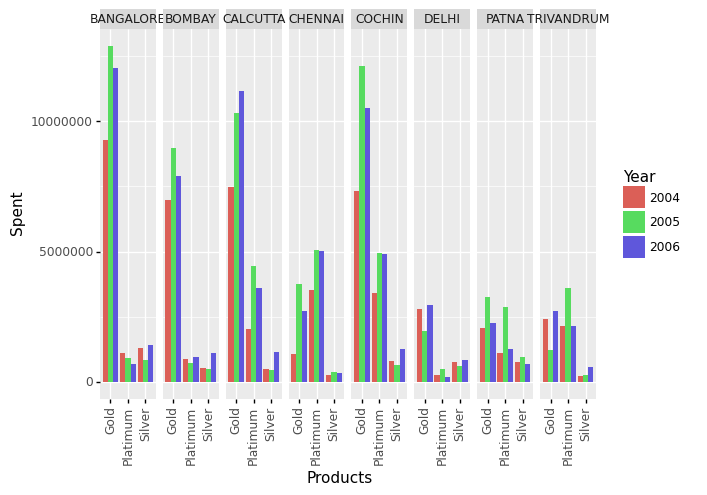

<ggplot: (155470915164)>

In [55]:
( ggplot(q3,aes(x='Product',y='Total', fill='Year'))
 + geom_bar(stat='identity',position=position_dodge())
 + facet_grid('. ~ City')
 + labs(x='Products', y='Spent')
 + theme(axis_text_x=element_text(angle = 90, vjust = 1))
) 

### Ques 4

In [56]:
q4_a = df_spend.groupby(['Mth','City']).sum()['Amount'].reset_index(name = 'Total')

In [57]:
q4_a

,Mth,City,Total
0,Apr,BANGALORE,4207980.48
1,Apr,BOMBAY,1873785.01
2,Apr,CALCUTTA,3457507.95
3,Apr,CHENNAI,2518656.99
4,Apr,COCHIN,3882744.94
...,...,...,...
91,Sep,CHENNAI,745759.40
92,Sep,COCHIN,1382242.90
93,Sep,DELHI,50001.00
94,Sep,PATNA,70329.95


In [58]:
m3 = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
q4_a['Mth'] = pd.Categorical(q4_a['Mth'], categories=m3, ordered=True)
q4_a.sort_values(by='Mth',inplace=True)
q4_a = q4_a.reset_index(drop=True)
q4_a

,Mth,City,Total
0,Jan,TRIVANDRUM,3704336.99
1,Jan,PATNA,4916205.55
2,Jan,DELHI,2714261.45
3,Jan,COCHIN,11714373.54
4,Jan,CHENNAI,4466961.36
...,...,...,...
91,Dec,COCHIN,909533.05
92,Dec,DELHI,842342.02
93,Dec,PATNA,50000.00
94,Dec,TRIVANDRUM,640922.26


C:\ProgramData\Anaconda3\lib\site-packages\plotnine\facets\facet_grid.py:136: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\facets\facet_grid.py:137: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead


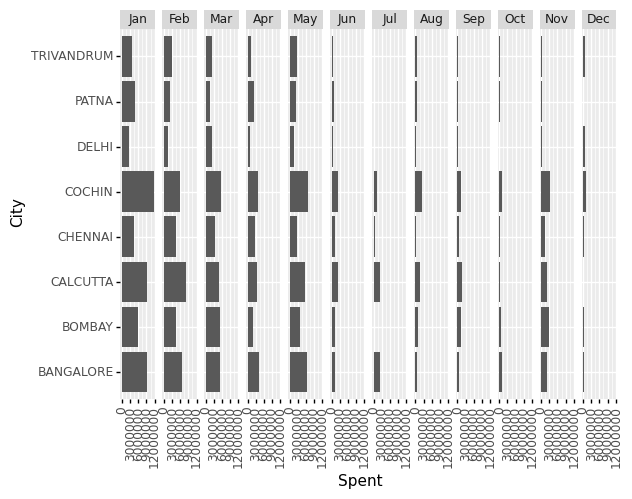

<ggplot: (-9223371881382572989)>

In [59]:
( ggplot(q4_a,aes(x='City',y='Total'))
 + geom_bar(stat='identity',position=position_dodge())
 + facet_grid('. ~ Mth')
 + labs(x='City', y='Spent')
 + coord_flip()
 + theme(axis_text_x=element_text(angle = 90, vjust = 1))
) 

In [60]:
q4_b = df_spend.loc[df_spend['Type']=='AIR TICKET'].groupby('Year').sum()['Amount'].reset_index(name='Total')

In [61]:
q4_b

,Year,Total
0,2004,4357225.35
1,2005,10550152.21
2,2006,5248469.56


No handles with labels found to put in legend.


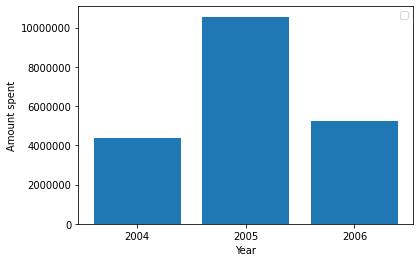

In [62]:
plt.bar(q4_b['Year'],q4_b['Total'])

plt.xlabel("Year")
plt.ylabel("Amount spent")
plt.xticks(q4_b['Year'])
plt.ticklabel_format(style='plain')

plt.legend()
plt.show()

In [63]:
q4_c = df_spend.groupby(['Mth','Product']).sum()['Amount'].reset_index(name='Total')

In [64]:
q4_c

,Mth,Product,Total
0,Apr,Gold,13170572.59
1,Apr,Platimum,5182493.86
2,Apr,Silver,1902322.65
3,Aug,Gold,4954030.42
4,Aug,Platimum,1714762.80
5,Aug,Silver,293109.82
6,Dec,Gold,2332940.96
7,Dec,Platimum,750156.19
8,Dec,Silver,200537.90
9,Feb,Gold,24779179.55


In [65]:
m4 = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
q4_c['Mth'] = pd.Categorical(q4_c['Mth'], categories=m4, ordered=True)
q4_c.sort_values(by='Mth',inplace=True)
q4_c = q4_c.reset_index(drop=True)
q4_c

,Mth,Product,Total
0,Jan,Silver,4206383.62
1,Jan,Platimum,14951578.51
2,Jan,Gold,32413831.83
3,Feb,Silver,2087018.37
4,Feb,Platimum,9134054.58
5,Feb,Gold,24779179.55
6,Mar,Gold,19256972.48
7,Mar,Silver,3909405.83
8,Mar,Platimum,7288837.68
9,Apr,Gold,13170572.59


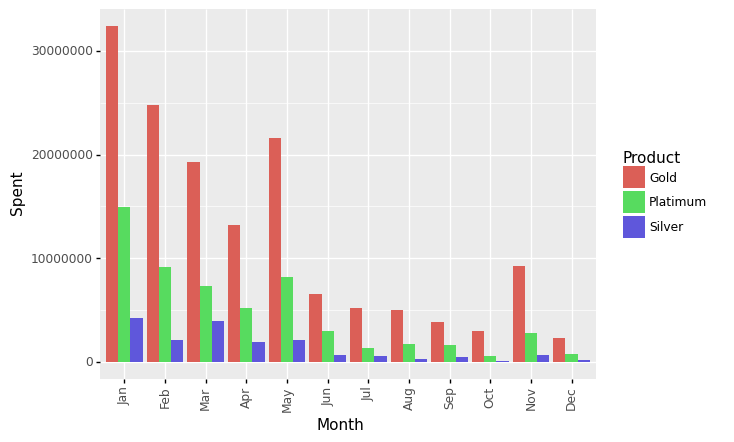

<ggplot: (155472770866)>

In [66]:
( ggplot(q4_c,aes(x='Mth',y='Total', fill='Product'))
 + geom_bar(stat='identity',position=position_dodge())
 + labs(x='Month', y='Spent')
 + theme(axis_text_x=element_text(angle = 90, vjust = 1))
) 

### Ques 5

In [67]:
df_repay['yearly']=df_repay.Month.apply(lambda x:x.year)
df_repay['monthly']=df_repay.Month.apply(lambda x:x.month)

In [68]:
def top10(product_category,time_period):
    return df_repay.loc[(df_repay.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

In [69]:
product_category=str(input("Enter Product Category in Gold/Silver/Platinum: "))
time_period=str(input("Enter Time Period in yearly/monthly: "))

Enter Product Category in Gold/Silver/Platinum: Gold
Enter Time Period in yearly/monthly: monthly


In [70]:
top10Customers = top10(product_category,time_period)

In [71]:
top10Customers

,Customer,City,Product,monthly,Amount
176,A61,COCHIN,Gold,4,3412860.60
132,A42,BOMBAY,Gold,5,3305341.39
113,A30,BANGALORE,Gold,5,3086549.14
107,A29,CALCUTTA,Gold,5,2612139.63
128,A42,BOMBAY,Gold,1,2516249.24
163,A60,CALCUTTA,Gold,1,2465584.81
145,A44,DELHI,Gold,1,2415712.91
0,A1,BANGALORE,Gold,1,2407806.29
166,A60,CALCUTTA,Gold,4,2397565.91
100,A28,TRIVANDRUM,Gold,5,2233253.41
